In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

In [5]:
# Función para cargar y describir los datos
def cargar_datos(file_path):
    print("Cargando el Titanic Dataset...")
    data = pd.read_csv(file_path)
    print("\nDescripción de los datos:")
    print(data.describe())
    print("\nInformación general:")
    data.info()
    return data

# Función para realizar análisis exploratorio
def analizar_datos(data):
    print("\nAnálisis exploratorio inicial...")
    print("\nValores nulos por columna:\n", data.isnull().sum())

    # Mapa de calor de correlaciones
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Mapa de Correlaciones")
    plt.show()

# Función para preprocesamiento de datos
def preprocesar_datos(data):
    print("\nPreprocesando datos...")
    
    # Tratamiento de valores faltantes
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    # Convertir variables categóricas en variables dummy
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

    # Eliminar columnas irrelevantes
    data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    
    print("\nDatos preprocesados:")
    print(data.head())
    return data

# Función para seleccionar características
def seleccionar_caracteristicas(data):
    print("\nSeleccionando características relevantes...")
    X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
    y = data['Fare']
    print("\nCaracterísticas seleccionadas:")
    print(X.head())
    return X, y

# Función para dividir el dataset
def dividir_datos(X, y):
    print("\nDividiendo los datos en conjuntos de entrenamiento y prueba...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
    print(f"Conjunto de prueba: {X_test.shape[0]} muestras")
    return X_train, X_test, y_train, y_test

# Función para entrenar el modelo
def entrenar_modelo(X_train, y_train):
    print("\nEntrenando modelo de Regresión Lineal...")
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("\nModelo entrenado.")
    print("\nCoeficientes del modelo:")
    print(f"Intercepto: {model.intercept_}")
    for feature, coef in zip(X_train.columns, model.coef_):
        print(f"{feature}: {coef:.2f}")
    return model

# Función para evaluar el modelo
def evaluar_modelo(model, X_test, y_test):
    print("\nEvaluando el modelo...")
    y_pred = model.predict(X_test)
    
    # Métricas de evaluación
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nError Absoluto Medio (MAE): {mae:.2f}")
    print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
    print(f"Coeficiente de Determinación (R²): {r2:.2f}")
    
    return y_pred

# Función para visualizar resultados
def visualizar_resultados(y_test, y_pred):
    print("\nVisualizando resultados...")

    # Comparación de valores reales y predichos
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label='Predicciones')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea Ideal')
    plt.xlabel('Tarifas Reales (Fare)')
    plt.ylabel('Tarifas Predichas (Fare)')
    plt.title("Comparación de Valores Reales y Predichos")
    plt.legend()
    plt.show()

    # Distribución de errores residuales
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30, color='blue')
    plt.axvline(0, color='red', linestyle='--', lw=2, label='Media de Errores')
    plt.title("Distribución de los Errores Residuales")
    plt.xlabel("Errores Residuales")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()

In [6]:
# Main script
if __name__ == "__main__":
    file_path = 'Titanic-Dataset.csv'
    
    # Cargar datos
    data = cargar_datos(file_path)


Cargando el Titanic Dataset...

Descripción de los datos:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Información general:
<


Análisis exploratorio inicial...

Valores nulos por columna:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


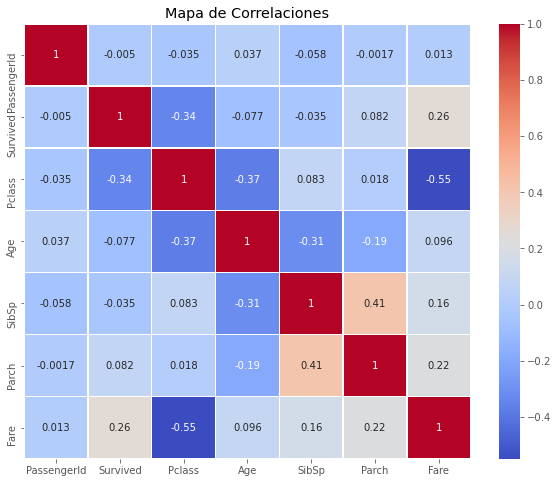

In [7]:
    # Análisis exploratorio
    analizar_datos(data)


In [10]:
    # Preprocesamiento
    data = preprocesar_datos(data)


Preprocesando datos...

Datos preprocesados:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500         1           0   
1         1       1  38.0      1      0  71.2833         0           0   
2         1       3  26.0      0      0   7.9250         0           0   
3         1       1  35.0      1      0  53.1000         0           0   
4         0       3  35.0      0      0   8.0500         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


In [12]:
    # Selección de características
    X, y = seleccionar_caracteristicas(data)


Seleccionando características relevantes...

Características seleccionadas:
   Pclass   Age  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0         1           0           1
1       1  38.0      1      0         0           0           0
2       3  26.0      0      0         0           0           1
3       1  35.0      1      0         0           0           1
4       3  35.0      0      0         1           0           1


In [13]:
    # División de datos
    X_train, X_test, y_train, y_test = dividir_datos(X, y)


Dividiendo los datos en conjuntos de entrenamiento y prueba...
Conjunto de entrenamiento: 712 muestras
Conjunto de prueba: 179 muestras


In [14]:
    # Entrenamiento del modelo
    model = entrenar_modelo(X_train, y_train)


Entrenando modelo de Regresión Lineal...

Modelo entrenado.

Coeficientes del modelo:
Intercepto: 125.87699023649495
Pclass: -33.93
Age: -0.08
SibSp: 5.80
Parch: 10.86
Sex_male: -3.61
Embarked_Q: -13.94
Embarked_S: -21.19


In [15]:
    # Evaluación del modelo
    y_pred = evaluar_modelo(model, X_test, y_test)


Evaluando el modelo...

Error Absoluto Medio (MAE): 20.81
Error Cuadrático Medio (MSE): 928.61
Coeficiente de Determinación (R²): 0.40



Visualizando resultados...


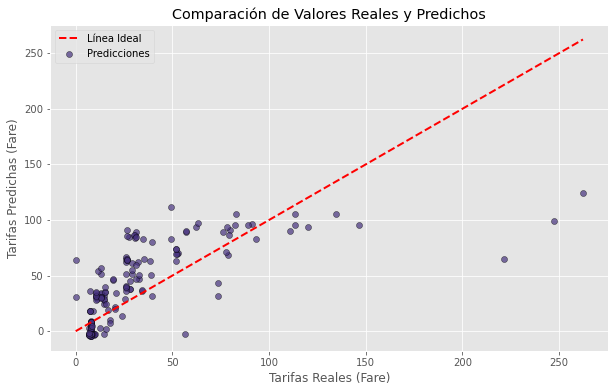

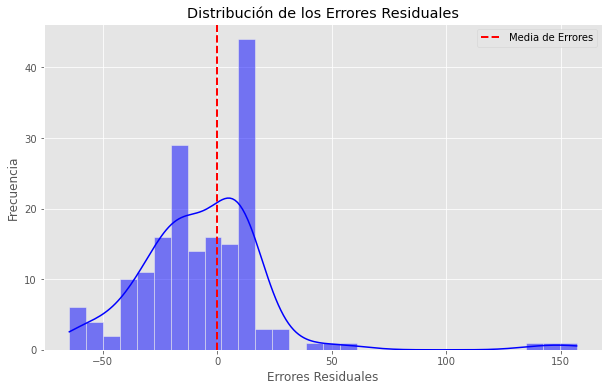

In [16]:
    # Visualización de resultados
    visualizar_resultados(y_test, y_pred)